   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
(200, 5)


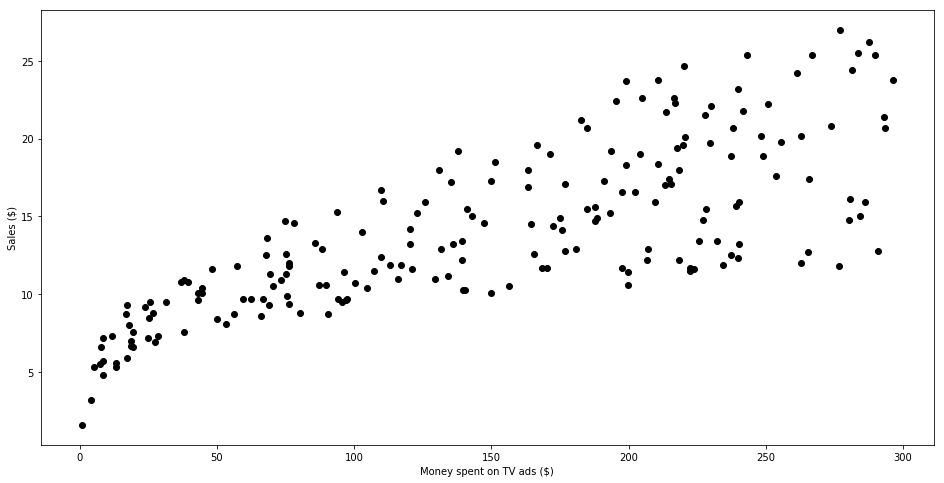

            Unnamed: 0        TV     radio  newspaper     sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
radio        -0.110680  0.054809  1.000000   0.354104  0.576223
newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
sales        -0.051616  0.782224  0.576223   0.228299  1.000000
<bound method NDFrame.head of         TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
5      8.7
6     57.5
7    120.2
8      8.6
9    199.8
10    66.1
11   214.7
12    23.8
13    97.5
14   204.1
15   195.4
16    67.8
17   281.4
18    69.2
19   147.3
20   218.4
21   237.4
22    13.2
23   228.3
24    62.3
25   262.9
26   142.9
27   240.1
28   248.8
29    70.6
..     ...
170   50.0
171  164.5
172   19.6
173  168.4
174  222.4
175  276.9
176  248.4
177  170.2
178  276.7
179  165.6
180  156.6
181  218.5
182   56.2
183  287.6
184  253.8
185  205.0
186  139.5
187  191.1
188  286.0
189   18.7
190   39.5
191

Text(0.5, 1.0, 'Linear Regression')

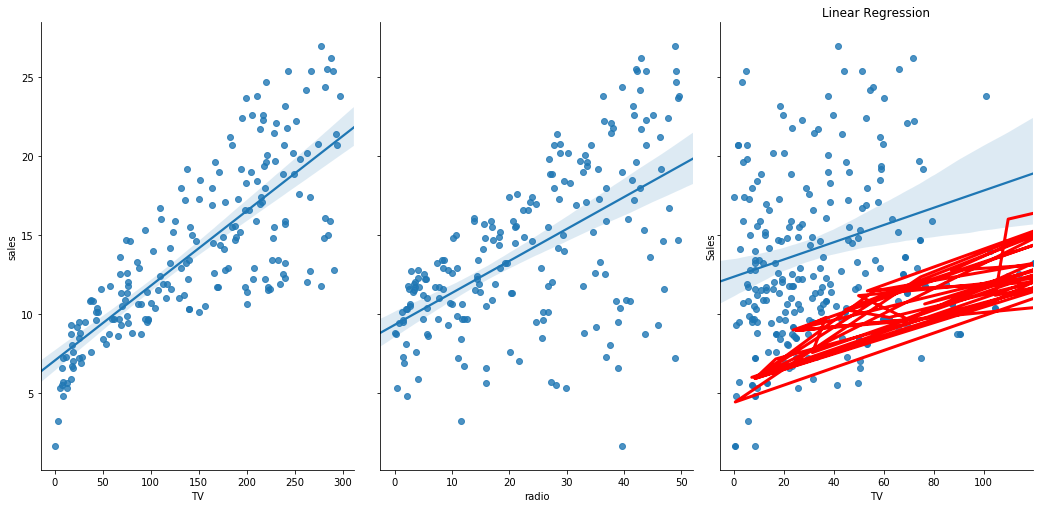

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.ensemble import  RandomForestRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

data = pd.read_csv('F:/MachineLearning/FTSamples-PR/RSamples/Advertising.csv')
print(data.head())
print(data.shape)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

#sns.pairplot(data)
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales',
             size=7, aspect=0.7, kind = 'reg')

feature_cols = ['TV']
#correlation
print(data.corr())

X = data[feature_cols]
print(X.head)
print(type(X))
print(X.shape)

y = data['sales']
print(type(y))
print(type(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=1/3)

print(X_train.sort_index())
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#Instantiate the Linear Regression
linreg = LinearRegression()

#Train the model
linreg.fit(X_train, y_train)

#Predict the test data
y_pred = linreg.predict(X_test)

#Printing the predicted values
print(y_pred)

#Linear Regression using statsmodel
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#Printing the B1 value of B0 + B1X (TV, newspaper, radio)
print('Co-efficient of linear regression',linreg.coef_)

#Printing the intercept value B0
print('Intercept of linear regression model',linreg.intercept_)

print('Mean Square Error', metrics.mean_squared_error(y_test, y_pred))

print('Model R^2 Square value', metrics.r2_score(y_test, y_pred))

#Accuracy (coefficient of regression accuracy score)
print(linreg.score(X_test, y_test))

#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
#--------------------------------------------------------------

X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

#RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=0)
forest_reg.fit(X_train, y_train)
print(forest_reg.score(X_test, y_test))

y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)

#GradientBoosting
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R squared": %.4f' % model.score(X_test, y_test))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Model Regression line on test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Linear Regression')